In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [73]:
x_train, y_train, x_test, y_test = ([] for x in range(4))

In [74]:
def convert(x):
    return bin(x)[2:].zfill(40)

In [75]:
with open('../src/data_train.txt','r') as pixels, open('../src/label_train.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_train.append(px)
        y_train.append(lb)
with open('../src/data_test.txt','r') as pixels, open('../src/label_test.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = list(map(int,''.join(l2)))
        lb = int(labels.readline())
        x_test.append(px)
        y_test.append(lb)
print(len(x_train),len(y_train),len(x_test),len(y_test))

60000 60000 10000 10000


In [76]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [77]:
train_count, features = x_train.shape
test_count = x_test.shape[0]

In [91]:
# first model
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(features,)))
model.add(Dropout(rate=0.6))
# model.add(Dense(units=128, activation='relu', input_shape=(features,)))
# model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 256)               409856    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_45 (Dense)            (None, 10)                2570      
                                                                 
Total params: 412,426
Trainable params: 412,426
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
24/24 [==============================] - 2s 66ms/step - loss: 0.9591 - accuracy: 0.6945 - val_loss: 0.3353 - val_accuracy: 0.9060
Epoch 2/50
24/24 [==============================] - 2s 64ms/step - loss: 0.4078 - accuracy: 0.8775 - val_loss: 0.2529 - val_accuracy: 0.9283
Epoch 3/50
24/24 [==============================] - 1s 62ms/step - loss: 0.3251 - accuracy: 0.9037 - val_loss: 0.2152 - val_accuracy: 0.9390
Epoch 4/50
24/24 [==============================] - 2s 74ms/step - loss: 0.2839 - accuracy: 0.9173 - val_loss: 0.1939 - val_accuracy: 0.9448
Epoch 5/50
24/24 [==============================] - 2s 68ms/step - loss: 0.2525 - accuracy: 0.9267 - val_loss: 0.1769 - val_accuracy: 0.9486
Epoch 6/50
24/24 [==============================] - 2s 65ms/step - loss: 0.2283 - accuracy: 0.9339 - val_loss: 0.1620 - val_accuracy: 0.9534
Epoch 7/50
24/24 [==============================] - 1s 60ms/step - loss: 0.2107 - accuracy: 0.9390 - val_loss: 0.1530 - val_accuracy: 0.9554
Epoch 8/50
24

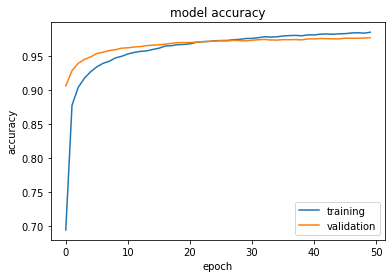

Test loss: 0.0824
Test accuracy: 0.976


In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=2048, epochs=25, shuffle=True, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, batch_size=2048)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [146]:
wList = model.get_weights()
wList[1] = np.reshape(wList[1], (1, wList[1].shape[0]))
wList[3] = np.reshape(wList[3], (1, wList[3].shape[0]))
wList[0].shape, wList[1].shape, wList[2].shape, wList[3].shape

((1600, 256), (1, 256), (256, 10), (1, 10))

In [101]:
a = np.random.rand(4,3)
a

array([[0.71289467, 0.02952694, 0.77026674],
       [0.52282601, 0.48580391, 0.9644464 ],
       [0.43504643, 0.90450656, 0.26226176],
       [0.20051594, 0.70311464, 0.52862021]])

In [103]:
a * (a < 0.5) / 0.5

array([[0.        , 0.05905388, 0.        ],
       [0.        , 0.97160783, 0.        ],
       [0.87009285, 0.        , 0.52452351],
       [0.40103188, 0.        , 0.        ]])

In [151]:
with open('text.txt','w') as g:
    for i in range(len(wList)):
        for j in range(wList[i].shape[0]):
            g.write(f"{' '.join(map(str,wList[i][j]))}\n")
            print(i,j)
        g.write('\n')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [157]:
for i in range(4):
    print(np.unique(wList[i]))

[-0.35406938 -0.34397066 -0.33736274 ...  0.29063872  0.31414837
  0.3442095 ]
[-0.15523092 -0.14346829 -0.12320122 -0.12004871 -0.11540292 -0.10579732
 -0.10470507 -0.10142864 -0.10132211 -0.09878937 -0.09795554 -0.09781182
 -0.09617866 -0.09502594 -0.0919393  -0.0907937  -0.08927792 -0.08781788
 -0.08777148 -0.08603989 -0.08246735 -0.08241079 -0.08204953 -0.07764938
 -0.07700657 -0.07442915 -0.07323329 -0.0724053  -0.07198618 -0.07168131
 -0.06960398 -0.06892366 -0.06758223 -0.06683477 -0.06632216 -0.06466818
 -0.06440113 -0.0635585  -0.0608311  -0.05951218 -0.05890272 -0.05865977
 -0.05861467 -0.05831306 -0.05817525 -0.0575841  -0.05724936 -0.0571975
 -0.05480741 -0.05470413 -0.05208833 -0.05075375 -0.04980706 -0.04959323
 -0.04867489 -0.04688391 -0.04662855 -0.04456443 -0.0435989  -0.0432521
 -0.0428076  -0.04260767 -0.04242383 -0.04130561 -0.04070356 -0.03935726
 -0.03911043 -0.03735397 -0.03526453 -0.03438181 -0.03395089 -0.03325674
 -0.03293737 -0.03284978 -0.03227259 -0.0317990